In [ ]:
import pandas as pd

import numpy as np

import tensorflow as tf

import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# Download training data

df_training = pd.read_csv("https://raw.githubusercontent.com/Aneg0707/ass2/main/Train.csv")

df_training

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


**Working with *MISSING* values**

Number of missing values:
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64 



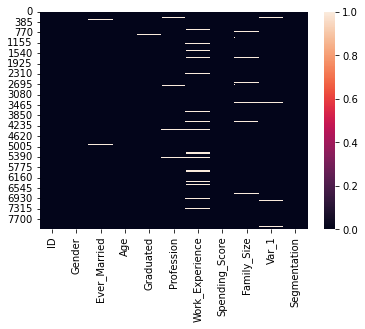

In [ ]:
# check and print number of missing values
print("Number of missing values:")
print(df_training.isnull().sum(), "\n")

# missing values heatmap
sns.heatmap(df_training.isnull());

Work experience has a lot of missing values (more that 10%). Deleting samples with missing work experience may case bias to the model since we do not know if the missing values are random or not. Replacing the missing values in work experience is not reccomended as wee as we got too much mising values (replacing them with median for example may cause bias to the model). 

Solution: excluding work experience column but replacing other missing values since their proportion is less than work experience 

In [ ]:
df_training = df_training.drop('Work_Experience', axis=1)
df_training = df_training.drop('ID', axis=1)

ID also dropped as we cannot predict something from the ID (unless remeber specific ID)

Replacing categorical missing values

In [ ]:
# Create a list of Categorical columns
catcols = []
for i in df_training.columns:
    if df_training[i].dtype == "object":
        catcols.append(i)

# create a list of categorical columns with missing values
catcols_missing = []
for i in catcols:
    if df_training[i].isnull().sum() > 0:
        catcols_missing.append(i)


for i in catcols_missing:
    df_training[i].fillna(df_training[i].mode()[0], inplace=True)
    print(i, "has missing values filled with mode")

Ever_Married has missing values filled with mode
Graduated has missing values filled with mode
Profession has missing values filled with mode
Var_1 has missing values filled with mode


In [ ]:
print("Number of missing values:")
print(df_training.isnull().sum(), "\n")

Number of missing values:
Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession          0
Spending_Score      0
Family_Size       335
Var_1               0
Segmentation        0
dtype: int64 



Replacing numerical
 missing values

In [ ]:
#dropping na for stat test

test = df_training['Family_Size']
test = test.dropna()
test

0       4.0
1       3.0
2       1.0
3       2.0
4       6.0
       ... 
8063    7.0
8064    4.0
8065    1.0
8066    4.0
8067    3.0
Name: Family_Size, Length: 7733, dtype: float64

In [ ]:
#https://pyshark.com/test-for-normality-using-python/

#Jarque–Bera normality test (FOR LARGE SAMPLE SIZE)

from scipy.stats import jarque_bera

result = (jarque_bera(test))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 1829.1310091117098
p-value: 0.0


p-values less than .05 => rejecting null => data is not normaly distributed => replacing missing values with median, NOT mean. (to reduce bias)

In [ ]:
df_training['Family_Size']=df_training['Family_Size'].fillna(df_training['Family_Size'].mean())

In [ ]:
print("Number of missing values:")
print(df_training.isnull().sum(), "\n")

Number of missing values:
Gender            0
Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Var_1             0
Segmentation      0
dtype: int64 



instead of changing categorical by dummies variables we will just change values for numbers (will be easier inserting new rows to predict)

In [ ]:
df_training['Segmentation'].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [ ]:
# replacing values

df_training['Ever_Married'] = df_training['Ever_Married'].replace(['No', 'Yes'],
                        [0, 1])

In [ ]:
# replacing values

df_training['Graduated'] = df_training['Graduated'].replace(['No', 'Yes'],
                        [0, 1])

In [ ]:
# replacing values

df_training['Gender'] = df_training['Gender'].replace(['Male', 'Female'],
                        [0, 1])

In [ ]:
# replacing values

df_training['Profession'] = df_training['Profession'].replace(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# replacing values

df_training['Spending_Score'] = df_training['Spending_Score'].replace(['Low', 'Average', 'High'],
                        [0, 1, 2])

In [ ]:
# replacing values

df_training['Var_1'] = df_training['Var_1'].replace(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'],
                        [0, 1, 2, 3, 4, 5, 6])

In [ ]:
# replacing values

df_training['Segmentation'] = df_training['Segmentation'].replace(['A', 'B', 'C', 'D'],
                        [0, 1, 2, 3])

In [ ]:
# Make sure data types are correct (no objects)

df_training.dtypes

Gender              int64
Ever_Married        int64
Age                 int64
Graduated           int64
Profession          int64
Spending_Score      int64
Family_Size       float64
Var_1               int64
Segmentation        int64
dtype: object

**Deep leaning Model**

In [ ]:
# Pop label

target = df_training.pop('Segmentation')

In [ ]:
list(df_training)

['Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Family_Size',
 'Var_1']

In [ ]:
# Define features


numeric_feature_names = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size', 'Var_1']

numeric_features = df_training[numeric_feature_names]

numeric_features.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1
0,0,0,22,0,0,0,4.0,3
1,1,1,38,1,1,1,3.0,3
2,1,1,67,1,1,0,1.0,5
3,0,1,67,1,2,2,2.0,5
4,1,1,40,1,3,2,6.0,5


In [ ]:
# Convert data to Tensorflow tensor


numeric_features = tf.convert_to_tensor(numeric_features)

numeric_features

# convert to tensorflow dataframe type to make it faster 

<tf.Tensor: shape=(8068, 8), dtype=float64, numpy=
array([[ 0.,  0., 22., ...,  0.,  4.,  3.],
       [ 1.,  1., 38., ...,  1.,  3.,  3.],
       [ 1.,  1., 67., ...,  0.,  1.,  5.],
       ...,
       [ 1.,  0., 33., ...,  0.,  1.,  5.],
       [ 1.,  0., 27., ...,  0.,  4.,  5.],
       [ 0.,  1., 37., ...,  1.,  3.,  3.]])>

In [ ]:
# Normalize data


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(numeric_features)


In [ ]:
# Define model



def get_basic_model():

  model = tf.keras.Sequential([

    normalizer,


    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(8, activation='relu'),


    tf.keras.layers.Dense(8, activation='tanh'),

    tf.keras.layers.Dense(4, activation='sigmoid'),

    tf.keras.layers.Dense(4) # possible 0, 1, 2, 3 (A B C D)

  ])



  model.compile(optimizer='adam',
                #----------------------------------

                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

                # loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),

                #---- enable or disable lines of code is it binary or not-----

                metrics=['accuracy'])

  return model

In [ ]:
# Train model



BATCH_SIZE = 512   #rows?



model = get_basic_model()

model.fit(numeric_features,target, epochs=250, batch_size=BATCH_SIZE)

Epoch 1/250
16/16 [==============================] - 1s 3ms/step - loss: 1.4334 - accuracy: 0.2442
Epoch 2/250
16/16 [==============================] - 0s 3ms/step - loss: 1.3999 - accuracy: 0.2442
Epoch 3/250
16/16 [==============================] - 0s 3ms/step - loss: 1.3720 - accuracy: 0.2669
Epoch 4/250
16/16 [==============================] - 0s 3ms/step - loss: 1.3470 - accuracy: 0.3731
Epoch 5/250
16/16 [==============================] - 0s 3ms/step - loss: 1.3238 - accuracy: 0.4208
Epoch 6/250
16/16 [==============================] - 0s 3ms/step - loss: 1.3027 - accuracy: 0.4367
Epoch 7/250
16/16 [==============================] - 0s 3ms/step - loss: 1.2845 - accuracy: 0.4370
Epoch 8/250
16/16 [==============================] - 0s 3ms/step - loss: 1.2699 - accuracy: 0.4380
Epoch 9/250
16/16 [==============================] - 0s 3ms/step - loss: 1.2579 - accuracy: 0.4414
Epoch 10/250
16/16 [==============================] - 0s 3ms/step - loss: 1.2470 - accuracy: 0.4450
Epoch 11/

In [ ]:
# Download test data


df_test = pd.read_csv("https://raw.githubusercontent.com/Aneg0707/ass2/main/Test.csv")

df_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


Number of missing values:
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64 



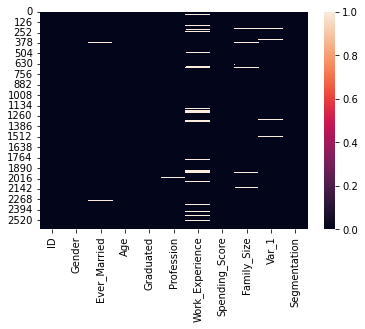

In [ ]:
# check and print number of missing values
print("Number of missing values:")
print(df_test.isnull().sum(), "\n")

# missing values heatmap
sns.heatmap(df_test.isnull());

Doing save data transformation as with Training data

In [ ]:
df_test = df_test.drop('Work_Experience', axis=1)
df_test = df_test.drop('ID', axis=1)

# Create a list of Categorical columns
catcols = []
for i in df_test.columns:
    if df_test[i].dtype == "object":
        catcols.append(i)

# create a list of categorical columns with missing values
catcols_missing = []
for i in catcols:
    if df_test[i].isnull().sum() > 0:
        catcols_missing.append(i)


for i in catcols_missing:
    df_test[i].fillna(df_test[i].mode()[0], inplace=True)
    print(i, "has missing values filled with mode")


df_test['Family_Size']=df_test['Family_Size'].fillna(df_test['Family_Size'].mean())


# replacing values

df_test['Ever_Married'] = df_test['Ever_Married'].replace(['No', 'Yes'],
                        [0, 1])


# replacing values

df_test['Graduated'] = df_test['Graduated'].replace(['No', 'Yes'],
                        [0, 1])


# replacing values

df_test['Gender'] = df_test['Gender'].replace(['Male', 'Female'],
                        [0, 1])

# replacing values

df_test['Profession'] = df_test['Profession'].replace(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8])

# replacing values

df_test['Spending_Score'] = df_test['Spending_Score'].replace(['Low', 'Average', 'High'],
                        [0, 1, 2])

# replacing values

df_test['Var_1'] = df_test['Var_1'].replace(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'],
                        [0, 1, 2, 3, 4, 5, 6])

# replacing values

df_test['Segmentation'] = df_test['Segmentation'].replace(['A', 'B', 'C', 'D'],
                        [0, 1, 2, 3])

Ever_Married has missing values filled with mode
Graduated has missing values filled with mode
Profession has missing values filled with mode
Var_1 has missing values filled with mode


In [ ]:
df_test

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation
0,1,1,36,1,1,0,1.0,5,1
1,0,1,37,1,0,1,4.0,5,0
2,1,1,69,0,4,0,1.0,5,0
3,0,1,59,0,5,2,2.0,5,1
4,1,0,19,0,8,0,4.0,5,0
...,...,...,...,...,...,...,...,...,...
2622,0,0,29,0,0,0,4.0,5,1
2623,1,0,35,1,6,0,1.0,5,0
2624,1,0,53,1,3,0,2.0,5,2
2625,0,1,47,1,5,2,5.0,3,2


In [ ]:
# Pop label

test_target = df_test.pop('Segmentation')

In [ ]:
# Define test features


test_numeric_feature_names = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Spending_Score', 'Family_Size', 'Var_1']

test_numeric_features = df_test[test_numeric_feature_names]

test_numeric_features.head()

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1
0,1,1,36,1,1,0,1.0,5
1,0,1,37,1,0,1,4.0,5
2,1,1,69,0,4,0,1.0,5
3,0,1,59,0,5,2,2.0,5
4,1,0,19,0,8,0,4.0,5


In [ ]:
# Convert test data to Tensorflow tensor


test_numeric_features = tf.convert_to_tensor(test_numeric_features)

test_numeric_features

<tf.Tensor: shape=(2627, 8), dtype=float64, numpy=
array([[ 1.,  1., 36., ...,  0.,  1.,  5.],
       [ 0.,  1., 37., ...,  1.,  4.,  5.],
       [ 1.,  1., 69., ...,  0.,  1.,  5.],
       ...,
       [ 1.,  0., 53., ...,  0.,  2.,  5.],
       [ 0.,  1., 47., ...,  2.,  5.,  3.],
       [ 1.,  0., 43., ...,  0.,  3.,  6.]])>

In [ ]:
# Normalize data


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(test_numeric_features)

In [ ]:
# Evaluate test data based on training data


score = model.evaluate(test_numeric_features, test_target, verbose=1)

print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

83/83 [==============================] - 0s 2ms/step - loss: 1.6100 - accuracy: 0.3247
Test loss: 1.6099666357040405 / Test accuracy: 0.32470497488975525
